<a href="https://colab.research.google.com/github/Anou26/Projects/blob/main/Heart_Attack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this packet, we will be exploring TensorFlow and Keras Deep learning API to detect Heart Attack to understand deep neural networks in python programming.
Here, we will be using an open-source dataset, https://drive.google.com/file/d/1YSFygrqgIFlhkjieNvYT0YLGK5_R5IOB/view?usp=sharing 

Download the dataset and we can move further to implementing it using TensorFlow and Keras deep learning API.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In the above code snippet, we have imported libraries numpy, pandas and matplotlib. Alongside, we have also imported TensorFlow and Keras which will play a major role in building a model for detecting/predicting heart attack.

In [ ]:
# Loading dataset
df=pd.read_csv('/content/gdrive/My Drive/CodeSpeedy/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In the above code snippet, we loaded the dataset and displayed the first five rows using head().
Now, let's get the information from our dataset,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# describe the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In the above code snippets, we have displayed the information pertaining to our dataset to understand the amount of data we'll be dealing with in this project. Now, let's move further into the correlation matrix of this dataset.

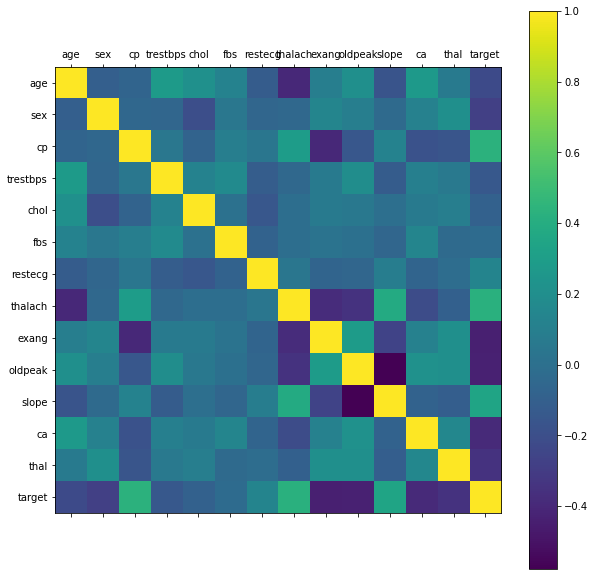

In [ ]:
mpl.rcParams['figure.figsize'] = 12, 10
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

Now, let's look at the dataset by depicting it as a histogram. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a68b2910>,
      dtype=object)

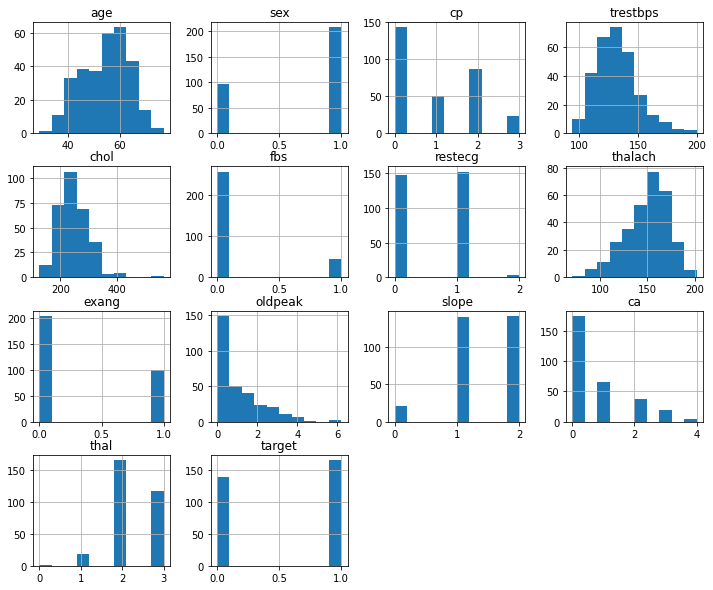

In [ ]:
df.hist()

Now, let's visualize our dataset more precisely.

Text(0.5, 1.0, 'Count of each Target Class')

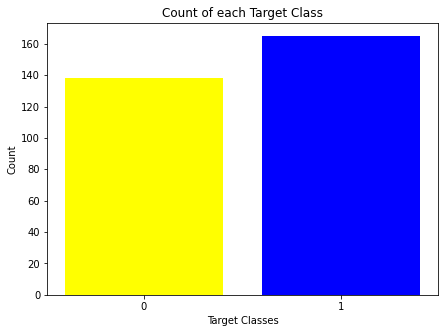

In [ ]:
dataset=df
mpl.rcParams['figure.figsize'] = 7,5
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['blue', 'yellow'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

We can also visualize and count the target class of the datasets provided.

In [ ]:
from sklearn.preprocessing import StandardScaler
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_scale] = standardScaler.fit_transform(df[columns_scale])

df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


We can observe here that there are lots of categorical values like 0’s and 1’s in our input feature, hence it is always advisable to obtain dummy variables for the aforementioned categorical variables.

Here, we used the function pd.get_dummies() to get dummy variables for categorical ones.




In [ ]:
# Let's split the data into train and test using sklearn
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(203, 30)

In the above code snippets, we used a random seed to generate a pseudo-random number and assign it to our tf graph. We also collected the shape of our input feature and created our model.
 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

In the above code snippet, we used sequential model. For input layer, relu activation function has been used and for output layer, sigmoid activation. We also used 20% dropout layer.

Now, let's summarise our dataset.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 722
Trainable params: 722
Non-trainable params: 0
_________________________________________________________________


Clearly, we have 722 trainable parameters.

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
7/7 [==============================] - 1s 52ms/step - loss: 0.6615 - accuracy: 0.5854 - val_loss: 0.6729 - val_accuracy: 0.5300
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6670 - accuracy: 0.6115 - val_loss: 0.6619 - val_accuracy: 0.5500
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6398 - accuracy: 0.6416 - val_loss: 0.6516 - val_accuracy: 0.5700
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.6188 - accuracy: 0.6433 - val_loss: 0.6414 - val_accuracy: 0.5900
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6070 - accuracy: 0.6492 - val_loss: 0.6320 - val_accuracy: 0.6100
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5847 - accuracy: 0.7060 - val_loss: 0.6225 - val_accuracy: 0.6100
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5804 - accuracy: 0.6829 - val_loss: 0.6125 - val_accuracy: 0.6400
Epoch 8/200
7/7 [======

In the above code, we have compiled our model using 200 epochs, with binary cross-entropy loss function and Adam optimizer. 

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])

In [ ]:
model_history.history

{'accuracy': [0.5911329984664917,
  0.6256157755851746,
  0.6453201770782471,
  0.6600984930992126,
  0.6403940916061401,
  0.6896551847457886,
  0.6847290396690369,
  0.7241379022598267,
  0.7241379022598267,
  0.7586206793785095,
  0.7832512259483337,
  0.7931034564971924,
  0.8423645496368408,
  0.8226600885391235,
  0.7980295419692993,
  0.8374384045600891,
  0.8226600885391235,
  0.8522167205810547,
  0.8522167205810547,
  0.8522167205810547,
  0.871921181678772,
  0.8472906351089478,
  0.807881772518158,
  0.866995096206665,
  0.8325123190879822,
  0.8374384045600891,
  0.8374384045600891,
  0.8866994976997375,
  0.8522167205810547,
  0.8522167205810547,
  0.8325123190879822,
  0.8620689511299133,
  0.8325123190879822,
  0.8571428656578064,
  0.8522167205810547,
  0.8866994976997375,
  0.8866994976997375,
  0.871921181678772,
  0.8817734122276306,
  0.8571428656578064,
  0.8620689511299133,
  0.8571428656578064,
  0.866995096206665,
  0.8916256427764893,
  0.866995096206665,
  0.

Now, let's predict the values using our model.

In [ ]:
y_pred = model.predict(X_test)
print (y_pred)

[[4.49897198e-06]
 [9.22515512e-01]
 [5.32087326e-01]
 [6.92555435e-09]
 [1.71626925e-05]
 [5.11014462e-03]
 [4.57763672e-04]
 [7.63618573e-07]
 [1.91019908e-11]
 [5.73486090e-04]
 [6.45526528e-01]
 [9.99243021e-01]
 [1.30167777e-07]
 [9.96501684e-01]
 [9.99987841e-01]
 [9.97757316e-01]
 [1.33751333e-02]
 [9.41372275e-01]
 [5.41586633e-06]
 [9.91782784e-01]
 [9.97629285e-01]
 [1.23041868e-03]
 [1.23620033e-04]
 [6.79194927e-04]
 [9.71078515e-01]
 [1.18508697e-01]
 [2.76136398e-03]
 [1.81025654e-01]
 [9.99972939e-01]
 [8.57495427e-01]
 [9.98006463e-01]
 [1.80059033e-06]
 [9.99472380e-01]
 [9.97956097e-01]
 [9.99806583e-01]
 [2.95773149e-03]
 [4.08599554e-09]
 [9.01257098e-01]
 [7.62103882e-05]
 [1.86818597e-05]
 [9.80174422e-01]
 [3.91290486e-01]
 [9.99960959e-01]
 [5.16760349e-03]
 [1.60458684e-03]
 [9.85392094e-01]
 [9.95872736e-01]
 [1.87020657e-06]
 [3.22499432e-07]
 [9.78845835e-01]
 [8.86632979e-01]
 [9.53217804e-01]
 [9.99988198e-01]
 [9.87334549e-01]
 [9.99989271e-01]
 [1.141392

We can verify the predicted output with the actual value.

In conclusion, we have predicted/detected heart attack using TensorFlow and Keras APIs in order to understand deep neural networks in python programming.

Thank you.
